# Continuous Control

---

This coding environment will be used to train the agent for the project.

## 1. Intro

### Start the environment

The next code cell installs a few packages.  This line will take a few minutes to run!

In [1]:
%%time
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.
CPU times: user 1.28 s, sys: 332 ms, total: 1.61 s
Wall time: 54.1 s


In [2]:
from unityagents import UnityEnvironment
import numpy as np

In [3]:
def initialize_env(unity_file):
    # Initialize the environment
    env = UnityEnvironment(file_name=unity_file)

    # Get default brain
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]

    # Get state and action spaces
    env_info = env.reset(train_mode=True)[brain_name]
    state_size = env_info.vector_observations.shape[1]
    action_size = brain.vector_action_space_size
    n_agents = len(env_info.agents)
    
    print('State size: ', state_size)
    print('Action size: ', action_size)
    print('Number of agents: ', n_agents)
    
    return env, brain_name, brain, state_size, action_size, n_agents

The environments corresponding to both versions of the project (1 and 20 agents, respectively) are already saved in the Workspace and can be accessed at the file paths provided below.
Please select one of the two options below for loading the environment.

In [4]:
# select this option to load version 1 (with a single agent) of the environment
# unity_file = '/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64'
# select this option to load version 2 (with 20 agents) of the environment
unity_file='/data/Reacher_Linux_NoVis/Reacher.x86_64'

env, brain_name, brain, state_size, action_size, n_agents = initialize_env(unity_file)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


State size:  33
Action size:  4
Number of agents:  20


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### Examine the State and Action Spaces

Let's print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'
      .format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.90150833e+00  -1.00000000e+00
   1.25147629e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -5.22214413e-01]


### Take Random Actions in the Environment

**In this coding environment, we will not be able to watch the agents while they are training**, and we should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
i_episode = 0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    i_episode += 1
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}. Number of episodes: {}.'
      .format(np.mean(scores), i_episode-1))

# Just to be sure they're not used any more
del states, actions, next_states, rewards, dones, scores

Total score (averaged over agents) this episode: 0.1304999970830977. Number of episodes: 1000.


## Submission

### Algorithm

#### Policy-Based Methods

Value-based methods can only deal with comparably small state spaces.
A table with values of states and actions is filled through the agent's interaction with the environment.
Thereby the optimal value function $q_*$ helps to find the optimal policy $\pi_*$.
For bigger (also: continuous) state spaces deep neural networks are used to learn the optimal action-value network.
A well-known algorithm is Deep Q-Learning (DQN).

Policy-based methods, in contrast to that, try to estimate the optimal policy without worrying about the optimal value function.
Methods such as Hill Climbing, Gradient Ascend or Stochastic Policy Search can be used for Policy Function Approximation. The so called Cross-Entropy Method and Evolution Strategies are further algorithms in this field.

Policy-Based methods are helpful, since they
 1. are simpler than value-based methods,
 2. are able to learn true stochastic policies and
 3. are able to deal with continuous action spaces.

#### Actor-Critic Methods

The general idea of actor-critic methods is to use value-based methods to further reduce the variance of policy-based methods.
One uses two function approximators (typically neural networks) to learn a policy (the Actor) and a value function (the Critic); the actor is learning to act, whereas the critic is learning to estimate situations and actions.
This combination typically results in more stable learning than value-based agents alone, but also fewer samples are necessary than for policy-based agents alone.

A basic Actor-Critic agent works as follows:
 1. Actor: Observe state $s$ of the environment
 1. Actor: Calculate distribution of action probabilities $\pi(a \mid s; \theta_{\pi})$, select action and execute
 1. Actor: Observe experience tuple of state, action, reward and next state: $o=(s, a, r, s')$
 1. Critic: Use the tuple $o$ for TD-estimate, to train critic: $r + \gamma V(s'; \theta_{V})$
 1. Critic: Calculate the advantage $A(s, a) = r + \gamma V(s'; \theta_{V}) - V(s; \theta_{V}) $
 1. Actor: Train the actor using the advantage

Common algorithms are
 - A3C (Asynchronous Advantage Actor-Critic)
 - A2C (Advantage Actor-Critic)
 - Generalized Advantage Estimation
 - DDPG (Deep Deterministic Policy Gradient)

#### Deep Deterministic Policy Gradient

DDPG has been introduced in Lillicrap et al., 2016.
It is being used in the implementation in the following.

DDPG combines the actor-critic approach with Deep Q-Learning.
It can be seen as a kind of approximate DQN instead of an actual actor-critic.
The actor provides the current policy, mapping states to continuous deterministic actions.
The critic is used to calculate action values.
DDPG is using a replay buffer (like DQN), and target networks.
This means, there are 2 copies of the network weights for each network (regular+target for actor, regular+target for critic), where the targets are updated using a soft update strategy.
The target network is used for prediction to stabilize training, whereas the regular network is the one that is being trained.

Process Noise is added in order to handle exploration (Ornstein-Uhlenbeck noise).

### Implementation

> The following solution is based on the code provided in [Udacity ddpg-bipedal](https://github.com/udacity/deep-reinforcement-learning/blob/master/ddpg-bipedal/DDPG.ipynb). In particular, it uses the files [model.py](https://github.com/udacity/deep-reinforcement-learning/blob/master/ddpg-bipedal/model.py) and [ddpg_agent/py](https://github.com/udacity/deep-reinforcement-learning/blob/master/ddpg-bipedal/ddpg_agent.py), as well as the code provided in the training loop `ddpg()`.

####  Neural Network Architecture

After trying the initial architecture from the Udacity bipolar walker, and reading in the student hub we adapt the model as follows:

For the **actor** we add another fully connected layer of neurons.
This results in the following number of neurons on each layer then (input, FC1, FC2, output): `33-400-300-4`.
The **critic** is adjusted in the same way.

We also experimented with batch normalization layers, as well as with using leaky relu activation functions.
It turned out, though, that neither is actually necessary to solve the task.
Regular relu activation functions are sufficient.

#### DDPG Algorithm Implementation

An initial [hyperparameter search](####Hyperparameter-grid-search) has been conducted with a slightly different implementation, adjusted for the 1-agent environment (for details, see ([previous state ongithub](https://github.com/toebgen/deep-reinforcement-learning/commit/3444b51e7e4b07696ad717595aaa60968631d18a)).
The current implementation works with the 20-agent environment.

In [7]:
import random
import datetime, time
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from workspace_utils import active_session

from ddpg_agent import Agent

In [8]:
def ddpg(env, brain_name, agent, n_agents,
         n_episodes=750, t_max=700):
    
    scores = []
    scores_deque = deque(maxlen=100)
    last_average_score = 0
    
    for i_episode in range(1, n_episodes+1):
        
        t_start = datetime.datetime.now()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(n_agents)
        
        for t in range(t_max):
            print('\rEpisode {}/{}, t: {}/{}'
                  .format(i_episode, n_episodes, t, t_max), end="")
            actions = agent.act(state)
            
            env_info = env.step(actions)[brain_name]     # send all actions to the environment
            next_state = env_info.vector_observations   # get next state (for each agent)
            rewards = env_info.rewards                  # get reward (for each agent)
            dones = env_info.local_done                 # see if episode finished

            agent.step(state, actions, rewards, next_state, dones, t)
            
            score += rewards
            state = next_state    # roll over states to next time step
            
            if np.any(dones):     # exit loop if episode finished
                print('\tSteps: ', t)
                break
                
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        average_score = np.mean(scores_deque)
        
        t_episode = datetime.datetime.now() - t_start
        print('\rEpisode: {}, Score: {:.2f}, time: {}'
              .format(i_episode, average_score, t_episode), end="")

        # average_score should be above 5. after 100 episodes! Abort if not...
        # if i_episode >= 100:
        #     if average_score < 5.:
        #         print('\nAverage score is only {:.3f} after {} episodes, '\
        #             'hence aborting this run!\n'.format(average_score, i_episode))
        #         break
        
        if i_episode % 10 == 0:
            print('')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

        if average_score >= 30.0:
            print('\n\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
                  .format(i_episode-100, average_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_solution.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_solution.pth')
            break
            
    return scores, average_score, t_episode

In [9]:
%%time

# Initialize agent
agent = Agent(state_size,
              action_size,
              n_agents,
              buffer_size=int(1e5),
              batch_size=128,
              gamma=.99,
              tau=1e-3,
              lr_actor=1e-4,
              lr_critic=1e-3,
              weight_decay=0.0,
              neurons_fc1=400,
              neurons_fc2=300,
              random_seed=2)

# Run training
scores, average_score, t_episode = ddpg(env, brain_name, agent, n_agents,
                                        n_episodes=500, t_max=1000)

Episode: 10, Score: 0.96, time: 0:00:15.771819
Episode: 20, Score: 2.01, time: 0:00:15.834622
Episode: 30, Score: 4.20, time: 0:00:15.565404
Episode: 40, Score: 6.01, time: 0:00:15.906623
Episode: 50, Score: 8.20, time: 0:00:15.900969
Episode: 60, Score: 10.97, time: 0:00:15.767438
Episode: 70, Score: 13.59, time: 0:00:15.796977
Episode: 80, Score: 15.90, time: 0:00:15.844105
Episode: 90, Score: 18.05, time: 0:00:15.806893
Episode: 100, Score: 19.88, time: 0:00:15.817509
Episode: 110, Score: 23.44, time: 0:00:15.879310
Episode: 120, Score: 26.69, time: 0:00:15.789897
Episode: 130, Score: 29.30, time: 0:00:15.812623
Episode: 133, Score: 30.02, time: 0:00:16.026419

Environment solved in 33 episodes!	Average Score: 30.02


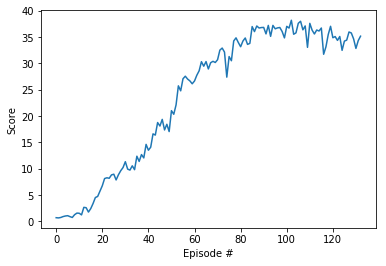

In [10]:
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

plot_scores(scores)

### Future Work

The tuning of hyperparameters can be further improved.
Possibly a framework like [hyperopt](https://github.com/hyperopt/hyperopt) or [optuna](https://optuna.org) can be used.

Other algorithms for solving the problem might also be interesting, such as:
- PPO
- A3C
- D4PG

Apparently the seeds used in the algorithm might also have a big influence on learning convergence.
It might be very interesting to explore this further.

### Appendix: Hyperparameter grid search

In an earlier stage of the project, manual try&error of a few hyperparameters did unfortunately not lead to a succesful model.
Hence, in order to find the best hyperparameters, we define some possible values and perform a grid search over the hyperparameter space.
It shall be pointed out, that the `ddpg()` method exits, if the score did not reach at least `5.0` after `100` episodes!

We have several hyperparameters for training the DDPG algorithm.
Some of them are listed in the following cell, including possible values.

In [11]:
N = 400  # Should be enough to solve this!
BUFFER_SIZE = [int(1e5), int(1e7)]
BATCH_SIZE = [64, 128, 256]
GAMMA = .99
TAU = 1e-3
LEARN_RATE = [1e-3, 1e-4]
WEIGHT_DECAY = 0.0
SEED = 2
T_MAX = [1000, 3000]
NEURONS = [128, 256]

Based on this, we can create all combinations of hyperparameters:

In [12]:
from collections import namedtuple
from itertools import product, starmap
import pickle

Combination = namedtuple('Combination', 'buffer_size batch_size learn_rate t_max neurons')

def named_product(**items):
    # Combination = namedtuple('Combination', items.keys())
    return starmap(Combination, product(*items.values()))

hyperparameter_combinations = []
for combination in named_product(buffer_size=BUFFER_SIZE,
                                 batch_size=BATCH_SIZE,
                                 learn_rate=LEARN_RATE,
                                 t_max=T_MAX,
                                 neurons=NEURONS):
    # print(combination)
    hyperparameter_combinations.append(combination)

len_hyperparameter_combinations = len(hyperparameter_combinations)
print('We will be testing {} combinations of hyperparameters!'
      .format(len_hyperparameter_combinations))

# Let's check a few of them
num_examples = 3
print('{} random Examples:'.format(num_examples))
for _ in range(num_examples):
    print(hyperparameter_combinations[random.randint(0, len_hyperparameter_combinations-1)])

We will be testing 48 combinations of hyperparameters!
3 random Examples:
Combination(buffer_size=100000, batch_size=128, learn_rate=0.0001, t_max=3000, neurons=256)
Combination(buffer_size=100000, batch_size=128, learn_rate=0.0001, t_max=3000, neurons=256)
Combination(buffer_size=100000, batch_size=128, learn_rate=0.0001, t_max=3000, neurons=128)


In [13]:
def grid_search(combinations_to_run):
    with active_session():
        agent = None
        scores_grid_search = []

        for i, hyperparameters in enumerate(hyperparameter_combinations):
            id = i+1
            if id not in combinations_to_run:
                continue

            print('Testing following hyperparameters ({}/{}):\n{}\n'
                  .format(id, len(hyperparameter_combinations), hyperparameters))

            # Delete any existing agent
            if agent is not None:
                del agent

            # Initialize agent
            agent = Agent(state_size,
                          action_size,
                          n_agents,
                          buffer_size=hyperparameters.buffer_size,
                          batch_size=hyperparameters.batch_size,
                          gamma=GAMMA,
                          tau=TAU,
                          lr_actor=hyperparameters.learn_rate,
                          lr_critic=hyperparameters.learn_rate,
                          weight_decay=WEIGHT_DECAY,
                          neurons=hyperparameters.neurons,
                          random_seed=SEED)

            # Run training
            scores, average_score, t_episode = ddpg(env, brain_name, agent, n_agents,
                                                    n_episodes=N, t_max=hyperparameters.t_max)

            # Save results
            print('Saving results...')
            scores_grid_search.append((hyperparameters, t_episode, scores, average_score))
            # TODO Write directly to CSV file...
            
        return scores_grid_search

In [14]:
%%time
run_grid_search = False

if run_grid_search:
    combinations_to_run = [12, 14, 15, 22, 23, 24, 25, 26, 27, 28, 38]  #[44]  # Pick this as "default" parameters
    scores_grid_search = grid_search(combinations_to_run)

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 23.4 µs


#### Environment with 1 Agent

Version `3444b51` ([github](https://github.com/toebgen/deep-reinforcement-learning/commit/3444b51e7e4b07696ad717595aaa60968631d18a)) reflects the used code for this hyperparameter search.
It used the environment with only 1 agent.

The output of the cell above has been manually put into the file `screen_scrape.txt`, and then processed by `create_csv.py`.
Resulting CSV file will be imported in the following cell.

In [15]:
import pandas as pd
grid_search = pd.read_csv("grid_search.csv")
grid_search['time'] = pd.to_datetime(grid_search['time']).dt.time
grid_search.sort_values(by='avg_score', ascending=False).head(10)

,id,buffer_size,batch_size,learn_rate,max_t,neurons,episodes,avg_score,time
45,27,10000000,64,0.0010,3000,128,100,1.37,00:00:14.567689
29,41,10000000,256,0.0010,1000,128,100,1.29,00:00:21.143977
26,37,10000000,128,0.0001,1000,128,100,1.28,00:00:17.895239
16,20,100000,256,0.0010,3000,256,100,1.27,00:00:20.971953
37,12,100000,128,0.0010,3000,256,100,1.20,00:00:16.543660
22,33,10000000,128,0.0010,1000,128,100,1.19,00:00:17.244626
46,28,10000000,64,0.0010,3000,256,100,1.18,00:00:14.360792
44,26,10000000,64,0.0010,1000,256,100,1.18,00:00:15.332227
32,44,10000000,256,0.0010,3000,256,100,1.16,00:00:19.806695
30,42,10000000,256,0.0010,1000,256,100,1.11,00:00:19.747336


As can be seen in the table above, none of the hyperparameter combinations results in a score of more than `1.37` after the first `100` episodes.
Several of the training runs have already been aborted after `50` episodes, since the score did not reach `1.0` by then.

It is expected, that training reaches at least a score of `5.0` after `100` episodes, as can be seen in other students' submissions and as discussed on the Udacity Nanodegree Slack channnel.
This holds even for the single agent environment.
Hence, an error in the current implementation of the training algorithm is suspected.

#### Switching to 20-agent environment

After reading up even more on the different agent environments it seems like the 20-agent environment is likely to converge quicker, hence the code has been slightly adapted to be able to work with 20 instead of only 1 agent.

When finished, we can close the environment.

In [16]:
env.close()